# Data Cleaning and Consistency Checks¶¶

## Table of Content

1. Import libraries and data

2. Check data shape, structure, and basic descriptive statistics

3. Consistency Checks

3.1 Missing values

3.2 Mixed-type data

3.3 Duplicates


4. Data Wrangling

4.1 Drop columns if necessary

5. Frequency Distributions and Outliers

5.1 Frequency Tables

5.2 Identifying and Removing Outliers/innaccurate data

6. Check shape, structure and basic descriptive statistics after updates


7. Export Data

# 1. Import Libraries¶

In [9]:
# Import libraries

import pandas as pd
import numpy as np
import os

In [10]:
# set path
path =r'/Users/juliapetke/Desktop/Julia Petke- Boat Sale'


In [11]:
# Import Data
df = pd.read_csv(os.path.join(path,'02 Data', 'Original Data', 'boat_data.csv'),index_col = False)

# 2. Check data shape, structure, and basic descriptive statistics

In [12]:
df.shape

(9888, 10)

In [13]:
df.head()

,Price,Boat Type,Manufacturer,Type,Year Built,Length,Width,Material,Location,Number of views last 7 days
0,CHF 3337,Motor Yacht,Rigiflex power boats,new boat from stock,2017,4.00,1.90,NaN,Switzerland Â» Lake Geneva Â» VÃ©senaz,226
1,EUR 3490,Center console boat,Terhi power boats,new boat from stock,2020,4.00,1.50,Thermoplastic,Germany Â» BÃ¶nningstedt,75
2,CHF 3770,Sport Boat,Marine power boats,new boat from stock,0,3.69,1.42,Aluminium,Switzerland Â» Lake of Zurich Â» StÃ¤fa ZH,124
3,DKK 25900,Sport Boat,Pioner power boats,new boat from stock,2020,3.00,1.00,NaN,Denmark Â» Svendborg,64
4,EUR 3399,Fishing Boat,Linder power boats,new boat from stock,2019,3.55,1.46,Aluminium,Germany Â» Bayern Â» MÃ¼nchen,58


In [14]:
df.dtypes

Price                           object
Boat Type                       object
Manufacturer                    object
Type                            object
Year Built                       int64
Length                         float64
Width                          float64
Material                        object
Location                        object
Number of views last 7 days      int64
dtype: object

In [15]:
df.describe()

,Year Built,Length,Width,Number of views last 7 days
count,9888.000000,9879.000000,9832.000000,9888.000000
mean,1893.192860,11.570017,3.520124,149.160801
std,460.201582,6.002820,1.220534,151.819752
min,0.000000,1.040000,0.010000,13.000000
25%,1996.000000,7.470000,2.540000,70.000000
50%,2007.000000,10.280000,3.330000,108.000000
75%,2017.000000,13.930000,4.250000,172.000000
max,2021.000000,100.000000,25.160000,3263.000000


# 3. Consistency Checks

## 3.1. Missing Values

In [12]:
# Check for missing values
df.isnull().sum()

Price                             0
Boat Type                         0
Manufacturer                   1338
Type                              6
Year Built                        0
Length                            9
Width                            56
Material                       1749
Location                         36
Number of views last 7 days       0
dtype: int64

In [16]:
# Drops any row with at least one NaN value
df_cleaned = df.dropna()

In [17]:
df_cleaned.shape


(7019, 10)

In [18]:
df_cleaned.isnull().sum()

Price                          0
Boat Type                      0
Manufacturer                   0
Type                           0
Year Built                     0
Length                         0
Width                          0
Material                       0
Location                       0
Number of views last 7 days    0
dtype: int64

Rows with missing data was removed


# 3.2. Mixed-type data

In [19]:
# Check for mixed-type data

for col in df_cleaned.columns.tolist():
    weird = (df[[col]].map(type) != df[[col]].iloc[0].apply(type)).any(axis = 1)
    if len(df[weird]) > 0:
        print (col)
    else: 
        print('There is no mixed-type data')

There is no mixed-type data
There is no mixed-type data
Manufacturer
Type
There is no mixed-type data
There is no mixed-type data
There is no mixed-type data
Material
Location
There is no mixed-type data


# 3.3. Duplicates

In [17]:
# Check for duplicate rows
duplicate_rows = df_cleaned[df_cleaned.duplicated()]

# Print the duplicate rows (if any)
print(duplicate_rows)

Empty DataFrame
Columns: [Price, Boat Type, Manufacturer, Type, Year Built, Length, Width, Material, Location, Number of views last 7 days]
Index: []


# 4 Data Wrangling

## 4.1 Dropping column if neccessary

In [20]:
df_cleaned.head()

,Price,Boat Type,Manufacturer,Type,Year Built,Length,Width,Material,Location,Number of views last 7 days
1,EUR 3490,Center console boat,Terhi power boats,new boat from stock,2020,4.00,1.50,Thermoplastic,Germany Â» BÃ¶nningstedt,75
2,CHF 3770,Sport Boat,Marine power boats,new boat from stock,0,3.69,1.42,Aluminium,Switzerland Â» Lake of Zurich Â» StÃ¤fa ZH,124
4,EUR 3399,Fishing Boat,Linder power boats,new boat from stock,2019,3.55,1.46,Aluminium,Germany Â» Bayern Â» MÃ¼nchen,58
5,CHF 3650,Sport Boat,Linder power boats,new boat from stock,0,4.03,1.56,Aluminium,Switzerland Â» Lake Constance Â» Uttwil,132
10,CHF 3500,Fishing Boat,Terhi power boats,"Used boat,Electric",1987,4.35,1.75,GRP,Switzerland Â» Seengen,239


In [21]:
# dropping Variable Length and Width 
df_cleaned = df_cleaned.drop(columns=['Length' , 'Width'])

In [22]:
df_cleaned.head(5)

,Price,Boat Type,Manufacturer,Type,Year Built,Material,Location,Number of views last 7 days
1,EUR 3490,Center console boat,Terhi power boats,new boat from stock,2020,Thermoplastic,Germany Â» BÃ¶nningstedt,75
2,CHF 3770,Sport Boat,Marine power boats,new boat from stock,0,Aluminium,Switzerland Â» Lake of Zurich Â» StÃ¤fa ZH,124
4,EUR 3399,Fishing Boat,Linder power boats,new boat from stock,2019,Aluminium,Germany Â» Bayern Â» MÃ¼nchen,58
5,CHF 3650,Sport Boat,Linder power boats,new boat from stock,0,Aluminium,Switzerland Â» Lake Constance Â» Uttwil,132
10,CHF 3500,Fishing Boat,Terhi power boats,"Used boat,Electric",1987,GRP,Switzerland Â» Seengen,239


# 5. Frequency Distributions and Outliers

## 5.1 Frequency Tables

In [23]:
# Create boxplot for price variable
import matplotlib.pyplot as plt
import seaborn as sns

<function matplotlib.pyplot.show(close=None, block=None)>

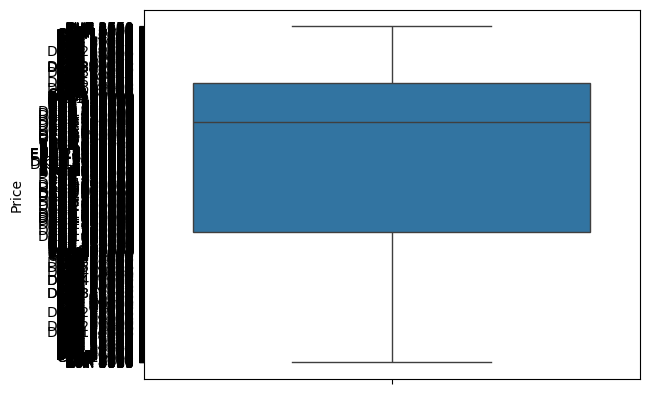

In [25]:
sns.boxplot(data = df_cleaned ['Price'])
title = 'Price'
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

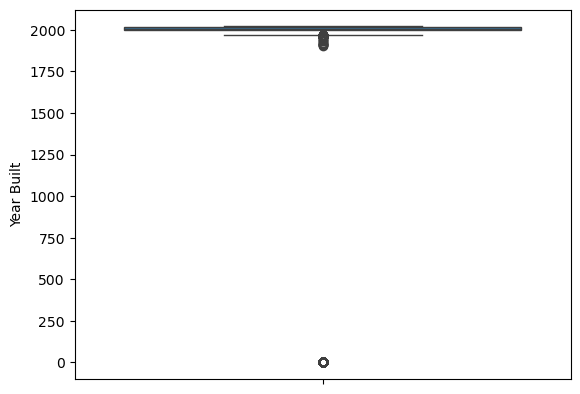

In [27]:
# Create boxplot for Year Built variable
sns.boxplot(data = df_cleaned ['Year Built'])
title = 'Year Built'
plt.show

In [38]:
# Drop record containing outlier with 0 Year Built. 
df_cleaned.drop(df_cleaned[df_cleaned['Year Built'] == 0].index, inplace=True)

<function matplotlib.pyplot.show(close=None, block=None)>

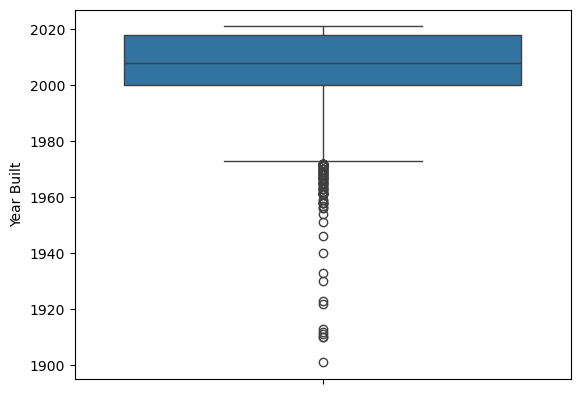

In [39]:
sns.boxplot(data=df_cleaned['Year Built'])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

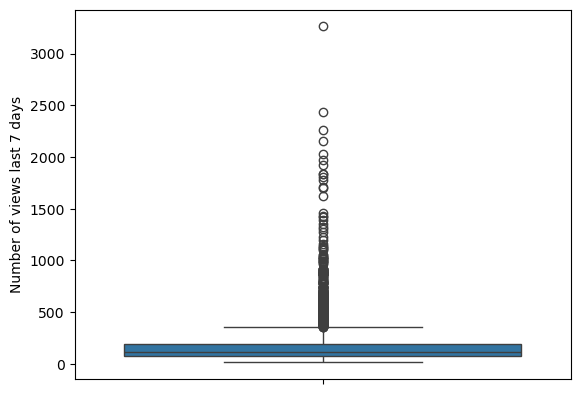

In [40]:
# Create boxplot for Year Built variable
sns.boxplot(data = df_cleaned ['Number of views last 7 days'])
title = 'Number of views last 7 days'
plt.show

# 6. Check shape, structure and basic descriptive statistics after updates

In [41]:
df_cleaned.shape


(6589, 8)

In [43]:
df_cleaned.head()

,Price,Boat Type,Manufacturer,Type,Year Built,Material,Location,Number of views last 7 days
1,EUR 3490,Center console boat,Terhi power boats,new boat from stock,2020,Thermoplastic,Germany Â» BÃ¶nningstedt,75
4,EUR 3399,Fishing Boat,Linder power boats,new boat from stock,2019,Aluminium,Germany Â» Bayern Â» MÃ¼nchen,58
10,CHF 3500,Fishing Boat,Terhi power boats,"Used boat,Electric",1987,GRP,Switzerland Â» Seengen,239
12,EUR 3500,Sport Boat,GS Nautica power boats,Used boat,2004,GRP,Italy Â» Lake Garda Â» Moniga del Garda (BS),69
13,CHF 4600,Runabout,Kimple power boats,new boat from stock,2020,Aluminium,Switzerland Â» Zugersee Â» Neuheim,113


In [44]:
df_cleaned.describe()

,Year Built,Number of views last 7 days
count,6589.000000,6589.000000
mean,2006.793292,161.814691
std,12.652581,170.823425
min,1901.000000,13.000000
25%,2000.000000,73.000000
50%,2008.000000,113.000000
75%,2018.000000,187.000000
max,2021.000000,3263.000000


# 7. Export Data

In [45]:
# Export Data
df_cleaned.to_csv(os.path.join(path, '02 Data', 'Prepared Data', 'Boat Sale_data_cleaned.csv'), index=False)